In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('/content/processed_life data_final.csv')
df.head(5)

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,...,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status_Developed,Economy_status_Developing,Life_expectancy,log_GDP_per_capita,log_Population_mln,log_Adult_mortality
0,Afghanistan,Asia,2000.0,90.5,129.2,310.8305,0.02,62.0,12.0,22.0,...,20.78,2.3,2.5,2.2,0.0,1.0,55.8,4.997212,3.033991,5.739248
1,Afghanistan,Asia,2001.0,87.9,125.2,304.8580,0.02,63.0,13.0,22.0,...,21.61,2.1,2.4,2.2,0.0,1.0,56.3,5.093750,3.073156,5.719846
2,Afghanistan,Asia,2002.0,85.3,121.1,298.8855,0.02,64.0,14.0,22.0,...,22.60,19.9,2.2,2.3,0.0,1.0,56.8,5.768321,3.117950,5.700061
3,Afghanistan,Asia,2003.0,82.7,116.9,292.0365,0.02,65.0,15.0,22.0,...,23.68,19.7,19.9,2.4,0.0,1.0,57.3,5.805135,3.164631,5.676879
4,Afghanistan,Asia,2004.0,80.0,112.6,285.1880,0.02,67.0,16.0,22.0,...,24.73,19.5,19.7,2.5,0.0,1.0,57.8,5.777652,3.208017,5.653149


In [3]:
dfa = df.drop(columns=['Country','Region','Year'])


# 특성과 타겟 변수 설정
X = dfa.drop(columns=['Life_expectancy'])
y = dfa['Life_expectancy']


# Random Forest

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 랜덤 포레스트 모델 훈련
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.27993461631944316
R-squared: 0.9968543770607838


In [ ]:
# Get feature importances from the regressor
feature_importance = rf_model.feature_importances_


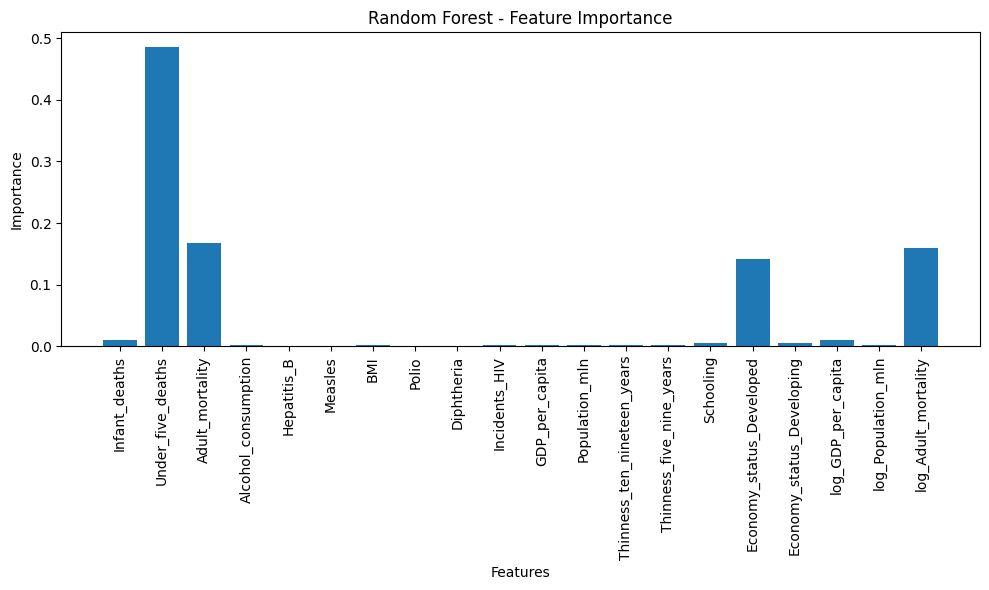

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance) # Assuming X.columns gives you feature names
plt.title("Random Forest - Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [8]:
from sklearn.model_selection import GridSearchCV

In [ ]:


# 하이퍼파라미터 그리드 설정
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# XGBoost 모델
rf_model = RandomForestRegressor(random_state=42)

# 그리드 서치 수행
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 최적의 파라미터 출력
print("Best parameters:", grid_search.best_params_)

# 최적의 모델로 예측
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Fitting 3 folds for each of 36 candidates, totalling 108 fits


KeyboardInterrupt: 

# adaboost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier #AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier #DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc #매트릭 측정
from sklearn.tree import DecisionTreeRegressor  #DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor  #AdaBoostRegressor
from sklearn.model_selection import train_test_split

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
base_estimator = DecisionTreeRegressor(max_depth=1)

adaboost = AdaBoostRegressor(estimator=base_estimator, n_estimators=50, random_state=42)
adaboost.fit(X_train_scaled, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=1), random_state=42)

In [ ]:
y_pred = adaboost.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R2)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 18.445212685042783
R-squared: 0.7927312995310994


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

feature_importance = adaboost.feature_importances_
# Instead of 'data.feature_names', use 'X.columns' to get feature names
feature_names = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance in AdaBoost Model')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

NameError: name 'adaboost' is not defined

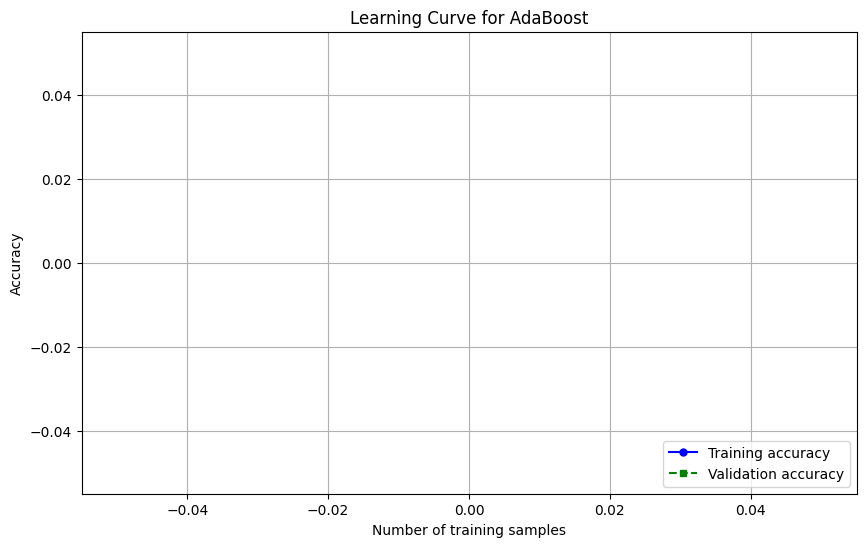

In [ ]:
from sklearn.model_selection import learning_curve # import the learning_curve function from the sklearn.model_selection module

train_sizes, train_scores, test_scores = learning_curve(
    adaboost, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy'
)



train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.title('Learning Curve for AdaBoost')
plt.legend(loc='lower right')
plt.grid()
plt.show()

# GB

In [5]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train_scaled, y_train)

NameError: name 'X_train_scaled' is not defined

In [ ]:
y_pred = gb.predict(X_test_scaled)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

Mean Squared Error: 0.78
R2 Score: 0.99


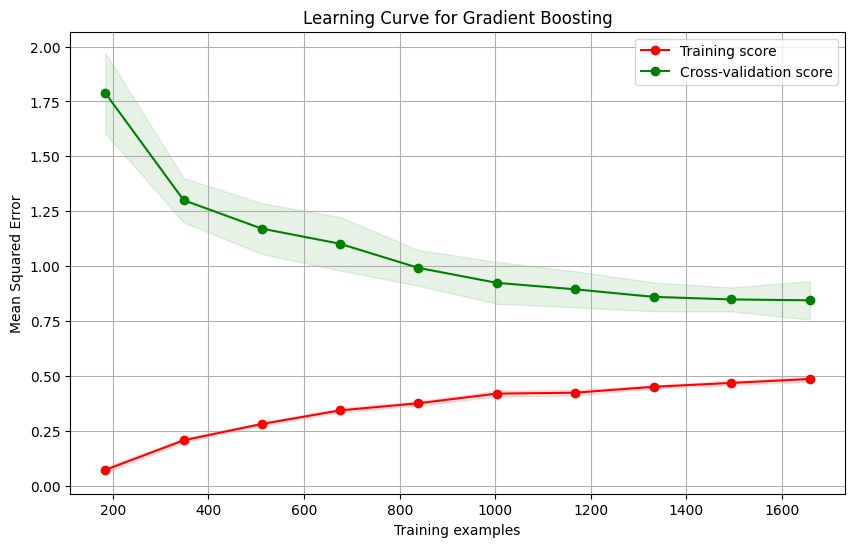

In [ ]:
# 학습 곡선
train_sizes, train_scores, test_scores = learning_curve(
    gb, X_train_scaled, y_train, cv=5, n_jobs=-1,
    train_sizes=np.linspace(0.1, 0.9, 10), scoring='neg_mean_squared_error'
)

train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve for Gradient Boosting")
plt.legend(loc="best")
plt.grid()
plt.show()

# XGBoost

In [6]:
import xgboost as xgb


# XGBoost의 DMatrix로 데이터 변환
train_dmatrix = xgb.DMatrix(X_train, label=y_train)
test_dmatrix = xgb.DMatrix(X_test, label=y_test)

# XGBoost 회귀 모델을 위한 파라미터 설정
params = {
    'objective': 'reg:squarederror',  # 회귀 문제, 제곱 오차 손실 함수
    'eval_metric': 'rmse',  # 루트 평균 제곱 오차 (RMSE)
    'max_depth': 3,  # 트리의 최대 깊이
    'eta': 0.1,  # 학습률
}

# 모델 학습
num_round = 100  # 반복 횟수
model = xgb.train(params, train_dmatrix, num_round)

# 예측
y_pred = model.predict(test_dmatrix)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


Mean Squared Error: 0.8252179260366438
Root Mean Squared Error: 0.908415062642977
R-squared: 0.99072703307607


In [9]:
from sklearn.model_selection import GridSearchCV

model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse')

# 그리드 서치 하이퍼파라미터 범위 설정
param_grid = {
    'max_depth': [3, 5, 7],  # 트리의 최대 깊이
    'learning_rate': [0.01, 0.1, 0.2],  # 학습률
    'n_estimators': [50, 100, 150],  # 트리의 개수
    'subsample': [0.8, 1.0],  # 샘플링 비율
    'colsample_bytree': [0.8, 1.0],  # 트리마다 선택하는 특성의 비율
}

# GridSearchCV 설정
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# 그리드 서치 수행
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print(f"Best parameters: {grid_search.best_params_}")

# 최적의 모델로 예측 수행
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

mae = mean_absolute_error(y_test, y_pred)
print("MAE:", mae)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150, 'subsample': 0.8}
Mean Squared Error: 0.19838626978407387
Root Mean Squared Error: 0.44540573613737156
R-squared: 0.9977707351478597
MAE: 0.3171393156051637


In [13]:
# 🎯 Step 1: 데이터 준비
X = df.drop(columns=['Life_expectancy', 'Country', 'Region'])  # 문자형 컬럼 제거
y = df['Life_expectancy']
countries = df['Country']  # 국가명 저장

# 🎯 Step 2: 데이터 분할
X_train, X_test, y_train, y_test, country_train, country_test = train_test_split(
    X, y, countries, test_size=0.2, random_state=42
)

# 🎯 Step 3: XGBoost 모델 학습
model = xgb.XGBRegressor(n_estimators=150, learning_rate=0.1, max_depth=7, subsample=0.8, colsample_bytree=1.0, random_state=42)
model.fit(X_train, y_train)

# 🎯 Step 4: 예측
y_pred = model.predict(X_test)

# 🎯 Step 5: 결과 정리
results_df = pd.DataFrame({
    'Country': country_test.values,
    'Actual Life Expectancy': y_test.values,
    'Predicted Life Expectancy': y_pred
})
results_df['Error (Prediction - Actual)'] = results_df['Predicted Life Expectancy'] - results_df['Actual Life Expectancy']
results_df['Absolute Error'] = results_df['Error (Prediction - Actual)'].abs()
results_df = results_df.round(2)

# 🎯 Step 6: 무작위 10개국 추출
sample_df = results_df.sample(n=10, random_state=42).sort_values(by='Error (Prediction - Actual)', ascending=False)

# 결과 출력
display(sample_df)


,Country,Actual Life Expectancy,Predicted Life Expectancy,Error (Prediction - Actual),Absolute Error
498,Kyrgyz Republic,70.2,70.879997,0.68,0.68
259,St. Vincent and the Grenadines,71.6,72.190002,0.59,0.59
29,Nigeria,50.9,51.419998,0.52,0.52
402,Mozambique,49.9,50.299999,0.40,0.40
380,El Salvador,69.4,69.650002,0.25,0.25
118,Germany,79.8,79.910004,0.11,0.11
400,Guinea,51.3,51.299999,-0.00,0.00
82,Lesotho,43.8,43.630001,-0.17,0.17
234,Nicaragua,69.9,69.620003,-0.28,0.28
346,Senegal,66.4,66.080002,-0.32,0.32


In [ ]:
r2_train = r2_score(y_train, best_model.predict(X_train)) # Calculate predictions for the training set
r2_test = r2_score(y_test, y_pred)

# 결과 출력
print(f"Train R²: {r2_train:.4f}")
print(f"Test  R²: {r2_test:.4f}")

# 과적합 여부 판단
gap = r2_train - r2_test
if gap > 0.1:
    print("⚠️ 과적합 가능성 있음 (Train과 Test 성능 차이 큼)")
elif gap < -0.1:
    print("❓ 역과적합 가능성 (Test가 Train보다 높음 - 확인 필요)")
else:
    print("✅ 과적합 없음 - 안정적인 모델로 보임")

Train R²: 0.9999
Test  R²: 0.9978
✅ 과적합 없음 - 안정적인 모델로 보임


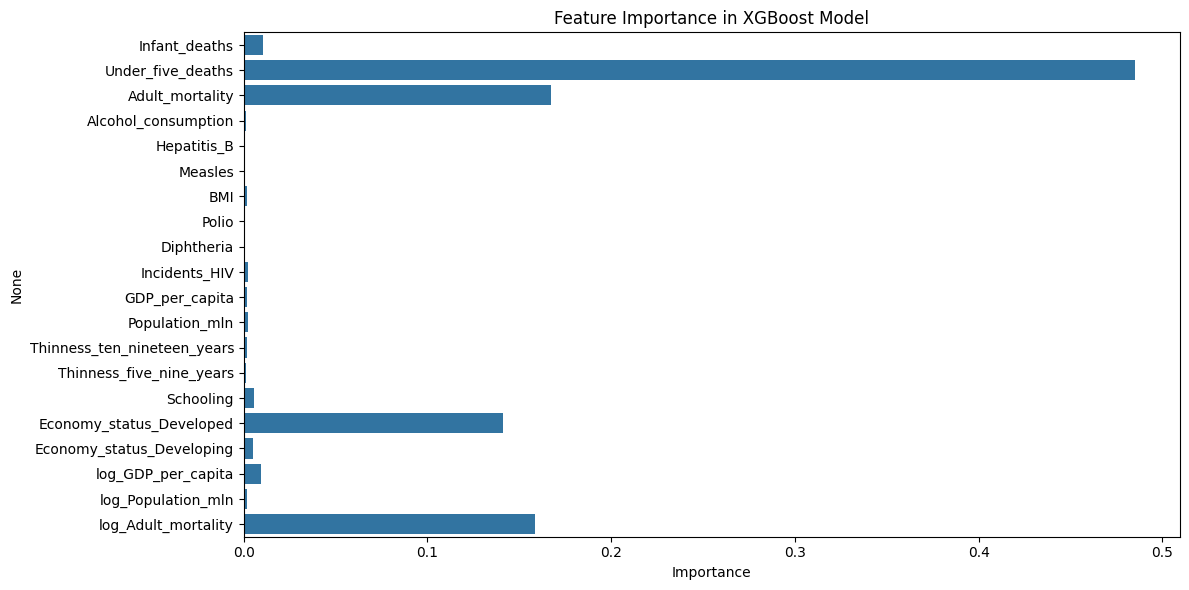

In [ ]:
# 특성 중요도 시각화
feature_importance = best_model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=feature_names)
plt.title('Feature Importance in XGBoost Model')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()

In [ ]:
# 학습 곡선
train_sizes = np.linspace(0.1, 0.9, 9)  # 0.1에서 0.9까지 9개의 값
train_losses = []
test_losses = []

for size in train_sizes:
    X_subset, _, y_subset, _ = train_test_split(X_train_scaled, y_train, train_size=size, random_state=42)
    model = xgb.XGBRegressor(**grid_search.best_params_, random_state=42)
    model.fit(X_subset, y_subset)
    train_pred = model.predict(X_subset)
    test_pred = model.predict(X_test_scaled)
    train_losses.append(mean_squared_error(y_subset, train_pred))
    test_losses.append(mean_squared_error(y_test, test_pred))

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_losses, 'o-', color="r", label="Training loss")
plt.plot(train_sizes, test_losses, 'o-', color="g", label="Validation loss")
plt.xlabel("Training set size ratio")
plt.ylabel("Mean Squared Error")
plt.title("Learning Curve for XGBoost")
plt.legend(loc="best")
plt.grid()
plt.show()

NameError: name 'X_train_scaled' is not defined

# 사망률 제거

In [ ]:
dfb = df.drop(columns=['Country','Region','Under_five_deaths','Adult_mortality','Infant_deaths','GDP_per_capita','Year','log_Adult_mortality'])


# 특성과 타겟 변수 설정
X = dfb.drop(columns=['Life_expectancy'])
y = dfb['Life_expectancy']


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 랜덤 포레스트 모델 훈련
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 예측
y_pred = rf_model.predict(X_test)

# 모델 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Mean Squared Error: 1.197229940972222
R-squared: 0.9865467371797239


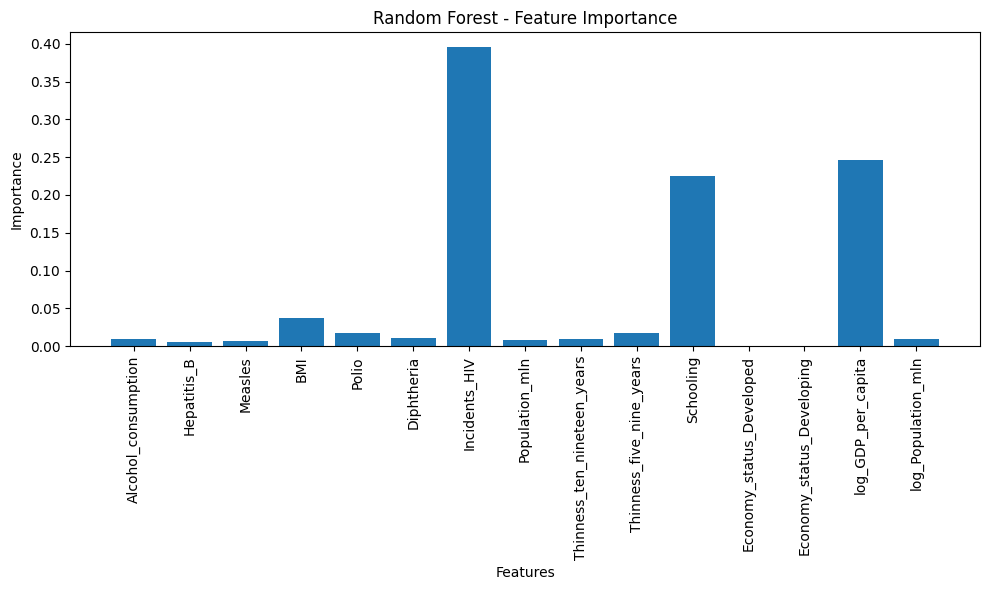

In [ ]:
# Get feature importances from the regressor
feature_importance = rf_model.feature_importances_

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(X.columns, feature_importance) # Assuming X.columns gives you feature names
plt.title("Random Forest - Feature Importance")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.xticks(rotation=90) # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. XGBoost 모델 학습
model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
model.fit(X_train, y_train)

# 6. 예측
y_pred = model.predict(X_test)

# 7. 모델 평가
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 1.5047646986113656
Mean Squared Error: 3.962743999703738
Root Mean Squared Error: 1.990664210685403
R-squared: 0.9554706788620788


# Ridge

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error



# 데이터 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 릿지 회귀 모델 훈련
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# 라쏘 회귀 모델 훈련
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

# MSE 평가
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)

print("Ridge MSE:", mse_ridge)
print("Lasso MSE:", mse_lasso)

r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Ridge MSE: 4.628997921407757
Lasso MSE: 5.0454302120383465
R-squared: 0.9952734391100317


# PCA

In [ ]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.datasets import make_regression



# 특성과 타겟 변수 설정
X = dfa.drop(columns=['Life_expectancy'])
y = dfa['Life_expectancy']


# 데이터 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA 적용 (주성분 5개로 차원 축소)
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)

# 훈련/테스트 세트 분리
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# 1. 랜덤 포레스트 모델 학습
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 예측
y_pred_rf = rf_model.predict(X_test)

# MSE와 R2 평가
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest MSE:", mse_rf)
print("Random Forest R-squared:", r2_rf)

# 2. XGBoost 모델 학습
xg_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xg_model.fit(X_train, y_train)

# 예측
y_pred_xg = xg_model.predict(X_test)

# MSE와 R2 평가
mse_xg = mean_squared_error(y_test, y_pred_xg)
r2_xg = r2_score(y_test, y_pred_xg)

print("XGBoost MSE:", mse_xg)
print("XGBoost R-squared:", r2_xg)


Random Forest MSE: 1.2726620555555512
Random Forest R-squared: 0.9856991071398715
XGBoost MSE: 1.3781889324592977
XGBoost R-squared: 0.984513302507859
